Sudoku Data Exploration

In [1]:
import sudoku_solving_algorithms as solvers
import pandas as pd
import seaborn as sns

In [2]:
filepath = r'D:/code/github/games/sudoku/benchmarks/'
minclue_df = pd.read_csv(f'{filepath}minclue_results_50.csv')

In [3]:
minclue_df

,Unnamed: 0,input,output,bf_time,lbf_time,solve_time,bf_loops,lbf_loops,solve_loops,ns_count,hs_count,nd_count,hd_count,nt_count,ht_count,nq_count,hq_count,r_count
0,0,0000000104000000000200000000000506040080003000...,7936845124865129371259738469327516845782463916...,3909.283524,1933.674352,0.115963,416786592,207781042,0,47,17,0,0,0,0,0,0,0
1,1,0000000120000350000006000707000003000004008001...,6738945129127354868456129737982613545264738911...,584.596980,380.303662,0.135958,69431642,40702905,0,29,35,0,0,0,0,0,0,0
2,2,0000000120036000000000070004100200000005003007...,6798354121236947585482179364167238958925613747...,46.186638,20.634252,0.111963,4598506,2252928,0,42,22,0,0,0,0,0,0,0
3,3,0000000120080300000000000401205000000000047000...,3467958122584316979718625431295764388352147697...,32.069788,17.480027,0.234926,3339758,1796983,0,35,29,6,2,2,0,0,0,0
4,4,0000000120400500000000090000706004000001000000...,5984637127428516393167298451756324988691452734...,1459.591732,887.865862,0.101969,148656139,92877437,0,41,23,0,0,0,0,0,0,0
5,5,0000000120504000000000000307006004000010000000...,3649785121524369788791256347386514296912473852...,324.986716,174.054565,0.134733,29903359,17617038,0,33,31,0,1,1,0,0,0,0
6,6,0000000123000000600000400009000005000000010700...,6498357123582179641726493859167845238345216797...,1891.646654,1077.531262,0.126525,195965164,112980320,0,45,19,0,2,2,0,0,0,0
7,7,0000000124000900000000000500702000006000004000...,3674859124253918671897263548732541966519734282...,144.857992,73.474822,25.729192,14082170,7255453,2650683,1,3,7,0,0,0,0,0,7
8,8,0000000125000080000007000006001200007000004500...,3786945125642183972917536846431259787128694538...,17.629080,7.817123,0.190938,2087439,889281,0,30,34,4,2,0,0,2,0,0
9,9,0000000127000600000000000500802000006000004000...,3468957127253619841984273569842561736517834292...,64.181941,30.198328,4.891664,6247386,3255544,429117,1,3,7,0,0,0,0,0,7


In [4]:
minclue_df.describe()

,Unnamed: 0,bf_time,lbf_time,solve_time,bf_loops,lbf_loops,solve_loops,ns_count,hs_count,nd_count,hd_count,nt_count,ht_count,nq_count,hq_count,r_count
count,50.00000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.0,50.000000
mean,24.50000,741.762656,405.991796,4.280061,8.333998e+07,4.648708e+07,4.369191e+05,31.900000,24.080000,1.400000,0.320000,0.260000,0.0,0.060000,0.0,0.960000
std,14.57738,1104.178699,583.797149,20.905264,1.231126e+08,6.790077e+07,2.215678e+06,13.316018,8.113581,2.899683,0.819158,0.750782,0.0,0.313636,0.0,2.732719
min,0.00000,17.629080,7.817123,0.075988,2.087439e+06,8.892810e+05,0.000000e+00,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,12.25000,163.065188,85.802096,0.115223,1.636134e+07,9.444554e+06,0.000000e+00,31.250000,23.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,24.50000,317.439861,172.968924,0.135729,2.771945e+07,1.652589e+07,0.000000e+00,37.000000,25.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,36.75000,626.501659,375.521859,0.182991,8.622739e+07,4.230240e+07,0.000000e+00,40.000000,29.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
max,49.00000,5740.884587,2447.529900,145.224562,5.148353e+08,2.767418e+08,1.538988e+07,47.000000,36.000000,10.000000,4.000000,4.000000,0.0,2.000000,0.0,14.000000


In [5]:
# sns.distplot()

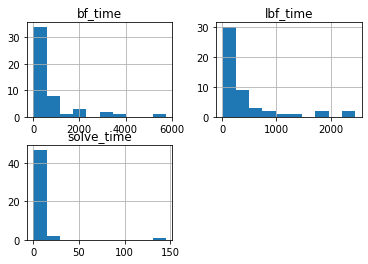

In [18]:
# for column in ['bf_time', 'lbf_time', 'solve_time']:
minclue_df[['bf_time', 'lbf_time', 'solve_time']].hist(bins=10);